# Emplyee Retention Prediction

```
Group Number : TY_08
Group Members:  Aditya Giradkar - 10
                Yash Halgaonkar - 16
                Shivam Itankar  - 28
                Mansi Jadhav    - 31
```


In [ ]:
import numpy as np
import pandas as pd

Before running the next code block, download the data set from the drive folder and upload it

In [ ]:
# Import the dataset
hr_df = pd.read_csv('hr_data.csv')
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


## Numerical Analysis

In [ ]:
hr_df.shape
# DF has 9 cols and 14999 data points

(14999, 9)

In [ ]:
hr_df.size

134991

In [ ]:
hr_df.info()

# As not null count of every column is equal to column length(14999), we can say that we have no null entries in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
# Different columns we have in our table
hr_df.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [ ]:
# Department is a nominal attribute
# let's find out number of unique Departments we have in our table
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
# Salary here is  also a nomial attribute as it is not integer
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
#Load the emploee satisfaction data
s_df = pd.read_excel('employee_satisfaction_evaluation.xlsx')
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [ ]:
s_df.info()
# we can see that there are some null values present in satisfaction_level col and last_evaluation column
# we will need to preprocess this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEE #          14999 non-null  int64  
 1   satisfaction_level  14972 non-null  float64
 2   last_evaluation     14972 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [ ]:
#Merging and Joining two dataset
main_df = hr_df.set_index('employee_id').join(s_df.set_index('EMPLOYEE #'))

In [ ]:
main_df = main_df.reset_index()

In [ ]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [ ]:
main_df.info()
#this is our main data frame
# We can see that null values are present in satisfaction_level and last_evaluation cols
# So we need to preprocess this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [224]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [225]:
main_df.isnull().sum()
# We can see that null entries are present in satisfaction_level and last_evaluation cols

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [227]:
# Replace the NULL values with mean of the column
main_df.fillna(main_df.mean(), inplace=True)

In [228]:
main_df.isnull().sum()
# We have no null values in our dataframe now

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [229]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.61283,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.24849,0.170984
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.09000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.44000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.64000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.82000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [230]:
main_df.mode().count()
# avrage_monthly_hours is bimofal

employee_id              14999
number_project               1
average_montly_hours         2
time_spend_company           1
Work_accident                1
left                         1
promotion_last_5years        1
department                   1
salary                       1
satisfaction_level           1
last_evaluation              1
dtype: int64

In [231]:
main_df.skew()
# form the following skew values we see that most of the attributes are symetric 
# in nature as there values lie between -1/2 to 1/2
# for some values like promotion_last_5years has highly positive value so it is highly right skewed

# from this we can infer that, Not many employee have got promotion in last 5 years

employee_id              0.030675
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
satisfaction_level      -0.477017
last_evaluation         -0.027013
dtype: float64

In [232]:
# Drop the employee_id column
main_df.drop(columns='employee_id', inplace=True)

In [233]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [234]:
# As department is a nominal attribute, we perform some queries on it
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [235]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [236]:
# Number of employee present in each department
group_dept = main_df['department'].value_counts()
group_dept

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [237]:
group_by_dept = main_df.groupby('department').count()
group_by_dept
# group_by_dept.left

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [238]:
# Left is another nominal attribute
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [239]:
main_df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

## Data Visualisation

In [240]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

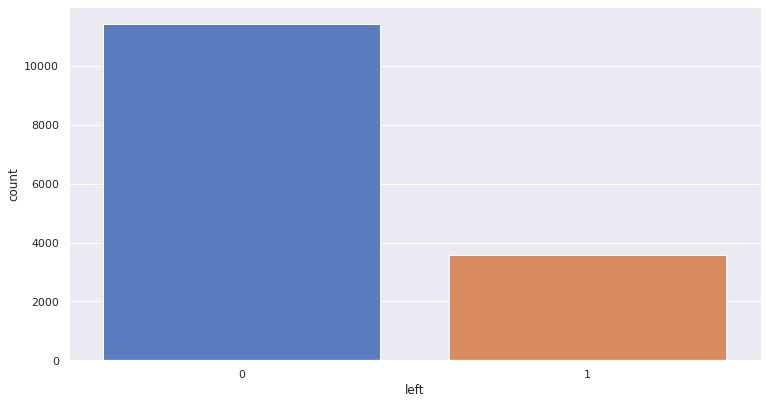

In [241]:
# Number of employee that left and stayed
with sns.color_palette('muted'):
    sns.countplot(x=main_df['left'])

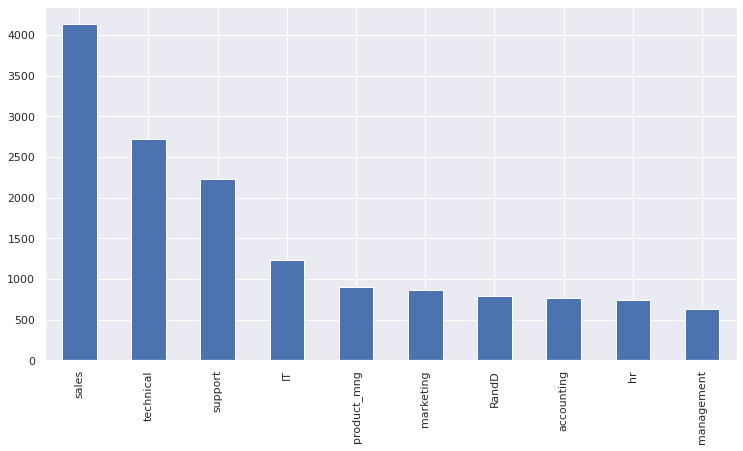

In [242]:
group_dept.plot.bar();
# Most of the employees are working in technical, support and sales

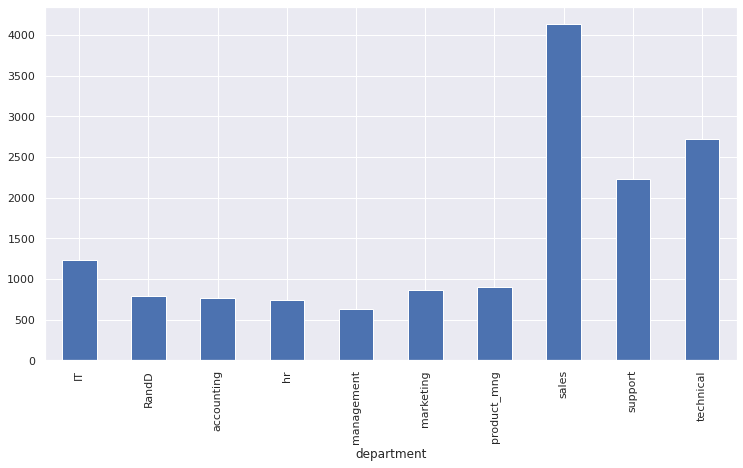

In [243]:
group_by_dept.left.plot.bar()
# Most of the employees that left the company belong to sales, support and technical department

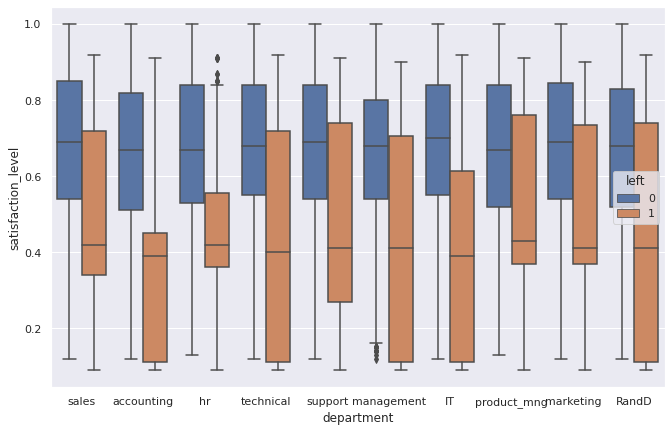

In [244]:
# Increase the size of chart
fig, boxplot = plt.subplots(figsize = (11,7))

sns.boxplot(x ='department', y ='satisfaction_level', data = main_df, hue ='left') 
# from the boxploat we see that most employee who not left the company have higher satisfaction level than those who left company

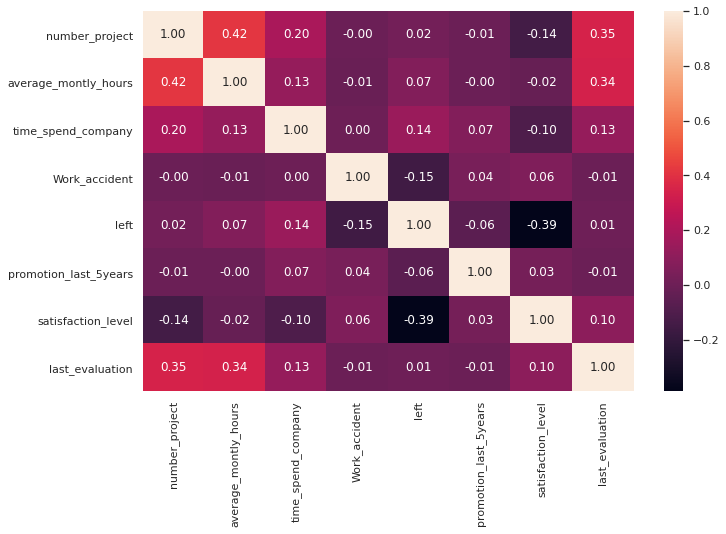

In [245]:
# Increase the size of chart
fig, heatmap = plt.subplots(figsize = (11,7))

sns.heatmap(main_df.corr(), annot=True, fmt='.2f')
#from this heatmap we see our y variable is highly corelated with satisfaction_level of that employee in the company 
#with -0.39 indicates it is negatively corelated

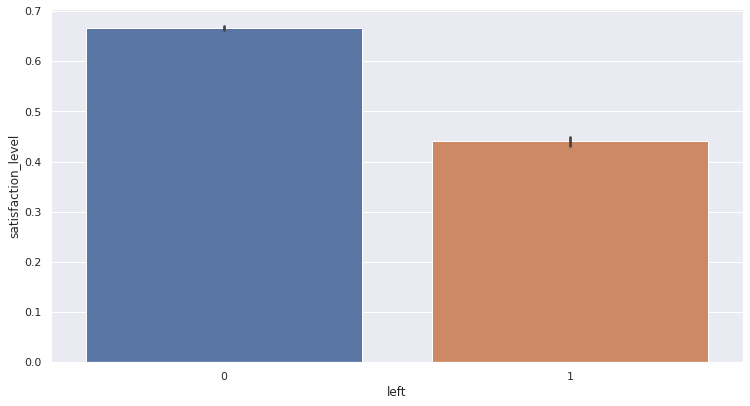

In [246]:

#so we explore it furthur with barplot 
sns.barplot(x='left', y='satisfaction_level', data=main_df)
#With barplot we can see the people who left the company are mostly unsatisfied(there average staisfaction level is around 40%)
#and those not left the company have average satisfaction_level of around 65%

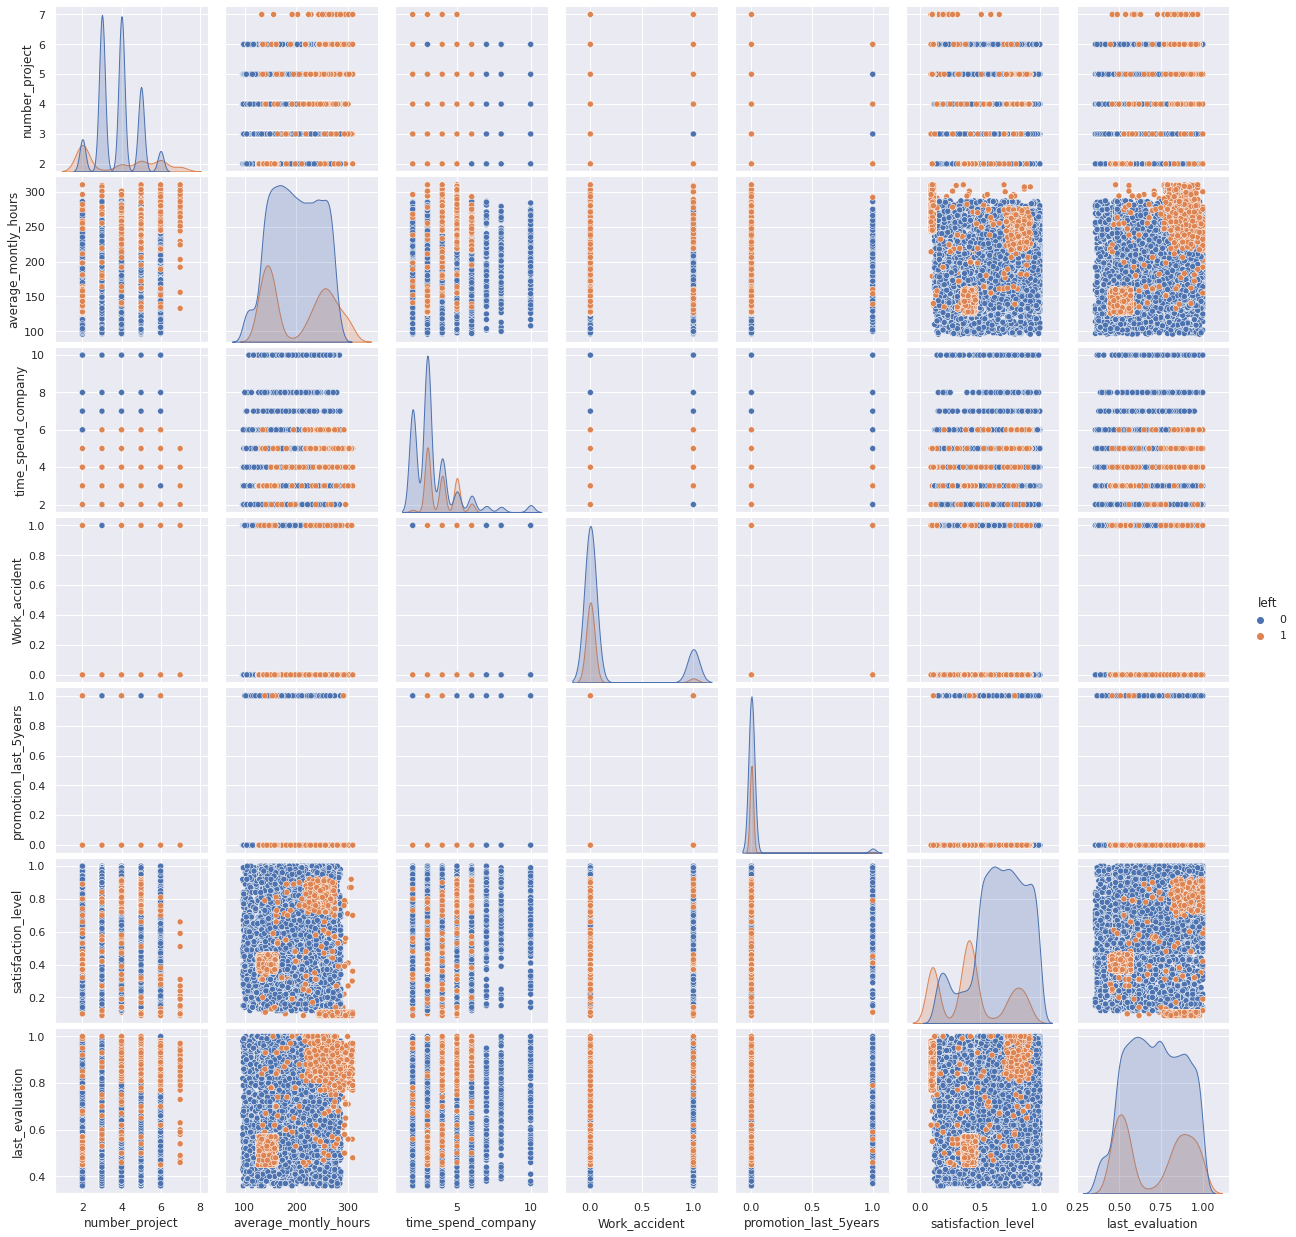

In [247]:
# column_list=main_df[['number_project','average_montly_hours','time_spend_company','left', 'satisfaction_level','Work_accident']]
sns.pairplot(main_df, hue='left')
#From promotion in last 5 year and satisfaction level we see that 
#those who not get promotion are less satisfied and eventually left the company

## Data Preprocessing

In [248]:
# We have two nominal attributes in our data frame [department,salary]
y = main_df[['department','salary']]
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [249]:
# Use Label Encode for nominal attributes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

main_df['salary'] = encoder.fit_transform(main_df['salary'])
main_df['department'] = encoder.fit_transform(main_df['department'])
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,7,1,0.38,0.53
1,5,262,6,0,1,0,7,2,0.80,0.86
2,7,272,4,0,1,0,7,2,0.11,0.88
3,5,223,5,0,1,0,7,1,0.72,0.87
4,2,159,3,0,1,0,7,1,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,8,1,0.40,0.57
14995,2,160,3,0,1,0,8,1,0.37,0.48
14996,2,143,3,0,1,0,8,1,0.37,0.53
14997,6,280,4,0,1,0,8,1,0.11,0.96


In [251]:
# Separate the dependant and independant variables
X = main_df.drop(['left'],axis=1)
Y = main_df.left

In [252]:
# Independant Variables
X

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,0,7,1,0.38,0.53
1,5,262,6,0,0,7,2,0.80,0.86
2,7,272,4,0,0,7,2,0.11,0.88
3,5,223,5,0,0,7,1,0.72,0.87
4,2,159,3,0,0,7,1,0.37,0.52
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,8,1,0.40,0.57
14995,2,160,3,0,0,8,1,0.37,0.48
14996,2,143,3,0,0,8,1,0.37,0.53
14997,6,280,4,0,0,8,1,0.11,0.96


In [253]:
# Dependant Variable
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [254]:
# Spliting of the dataset 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=89)

# Dictionary to main score of different models we use
scores_dict = {}

## Model Prediction

### Decision Tree

In [255]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100
accuracy_dt

In [256]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [257]:
# Try using emtropy as a criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train,y_train)
predict_entropy = dt_entropy.predict(X_test)
accuracy_score(y_test,predict_entropy)*100
# we can see that there is not much difference in the accuracy even if we change the critrion

97.88888888888889

In [258]:
# Print the accuracy Score
# Add the accuracy score to the dictionary
# Print the classification report
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt


confusion_matrix(y_test,prediction_dt,labels=[1,0])

Accuracy score :  97.95555555555555


array([[1029,   39],
       [  53, 3379]])

In [259]:
dt.feature_importances_

array([1.05570841e-01, 9.34904977e-02, 1.36992877e-01, 3.30072148e-03,
       1.56801351e-04, 1.45108580e-02, 3.94724032e-03, 4.97396097e-01,
       1.44634066e-01])

In [260]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)
feature_importance

# WE can see that Satisfaction Level is the most important feature in predicting the output

,Importance
satisfaction_level,0.497396
last_evaluation,0.144634
time_spend_company,0.136993
number_project,0.105571
average_montly_hours,0.093490
department,0.014511
salary,0.003947
Work_accident,0.003301
promotion_last_5years,0.000157


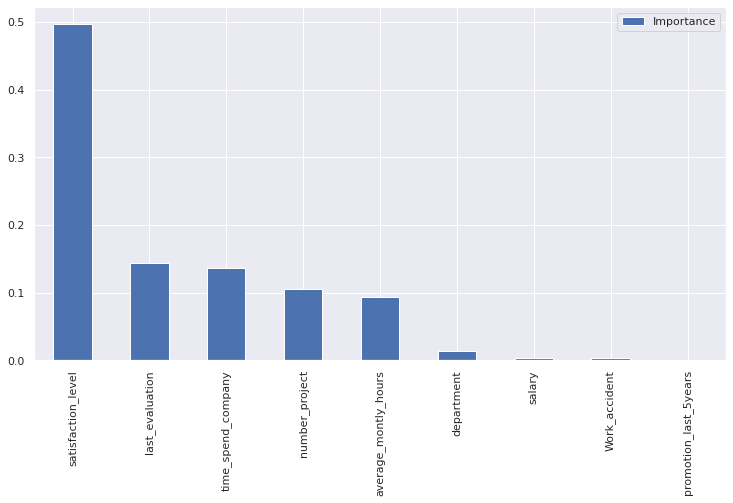

In [261]:
# Visualization of importance od various attributes
feature_importance.plot.bar()

### Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
# We can see that default value of n_estimators is 100

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [263]:
model.score(X_test,y_test)

0.9911111111111112

In [264]:
confusion_matrix(y_test,model.predict(X_test))

array([[3430,    2],
       [  38, 1030]])

In [265]:
scores_dict['RandomForest'] = model.score(X_test,y_test)*100

In [ ]:
# DONT RUN
# Lets ecxplore the result for different size of forest
accu = []

for k in range(100,5000,100):
  model_forest = RandomForestClassifier(n_estimators=k)
  model_forest.fit(X_train,y_train)
  accu.append(model_forest.score(X_test,y_test))

accu

In [ ]:
plt.plot(range(100,5000,100),accu)

### KNN

In [266]:
# Data Preprocessing for KNN
from sklearn.preprocessing import StandardScaler
print(list(main_df.columns))

['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary', 'satisfaction_level', 'last_evaluation']


In [268]:
num_features = list(main_df.columns)
for x in ['salary','department','left']:
    num_features.remove(x)

sc = StandardScaler()

X_train_std=sc.fit_transform(X_train[num_features])
X_test_std=sc.transform(X_test[num_features])

In [269]:
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,26)
scores={}
scores_list=[]
bestk=0
h_score = 0

for i in range(1,26):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_std,y_train)
    pred = clf.predict(X_test_std)
    scores[i]=accuracy_score(y_test,pred)
    if scores[i]>h_score:
        h_score = scores[i]
        bestk = i
    scores_list.append(scores[i])
print('Best k is {} with score : {}'.format(bestk,h_score))

Best k is 1 with score : 0.98


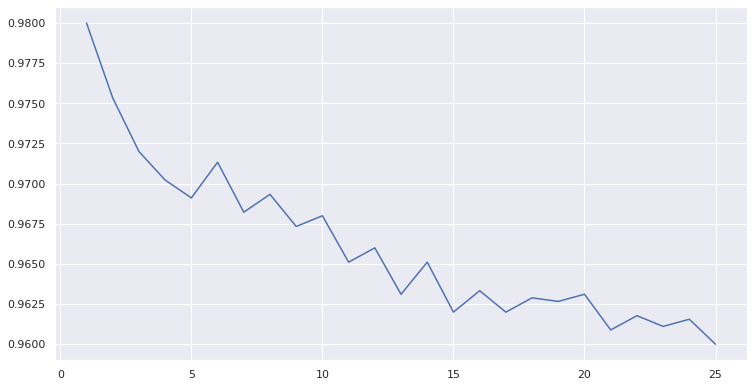

In [270]:
# Visulize how accuracy decrease as k increases
plt.plot(k_range,scores_list)

In [271]:
# main model for KNN
knn=KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train_std,y_train)
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
knn
# By Default, p=2
# We are using Euclidian distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [272]:
print('Accuracy score : ',accuracy_knn)
scores_dict['KNeighborsClassifier'] = accuracy_score(y_test,prediction_knn)*100
print(confusion_matrix(y_test,prediction_knn))

Accuracy score :  98.0
[[3371   61]
 [  29 1039]]


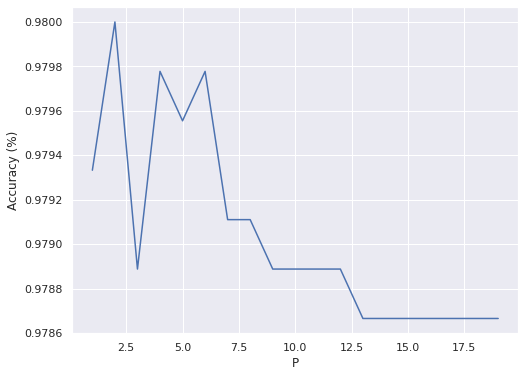

In [273]:
# Lets try using different values of P
accuracies = []
for k in range(1,20):
    knn_p=KNeighborsClassifier(n_neighbors=bestk,p=k)
    knn_p.fit(X_train_std,y_train)
    y_hat_test = knn_p.predict(X_test_std)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,20), accuracies)
ax.set_xlabel('P')
ax.set_ylabel('Accuracy (%)');

### SVM

In [274]:
from sklearn.svm import SVC
model = SVC().fit(X_train_std,y_train)
pred = model.predict(X_test_std)
svc_accuracy = accuracy_score(y_test,pred)*100
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [275]:
print('Accuracy score : ',svc_accuracy)
scores_dict['SVC'] = svc_accuracy
print(confusion_matrix(y_test,pred))

Accuracy score :  96.53333333333333
[[3369   63]
 [  93  975]]


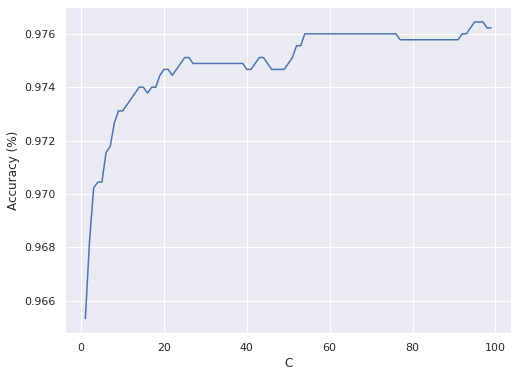

In [280]:
# DONT RUN
# Lets check accuracy for different C
accuracies = []
for k in range(1,100):
    svm_c = SVC(C=k).fit(X_train_std,y_train)
    y_hat_test = svm_c.predict(X_test_std)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('C')
ax.set_ylabel('Accuracy (%)');

In [276]:
# Lets try for different kernal types
kernal_types = ['linear','poly','rbf','sigmoid']
acc_dic = {}

for kernal in kernal_types:
    svm_kernal = SVC(kernel = kernal).fit(X_train_std,y_train)
    y_hat_test = svm_c.predict(X_test_std)
    acc_dic[kernal] = accuracy_score(y_test, y_hat_test)

acc_dic

# We get the same accuracy for different kernel types

{'linear': 0.9762222222222222,
 'poly': 0.9762222222222222,
 'rbf': 0.9762222222222222,
 'sigmoid': 0.9762222222222222}

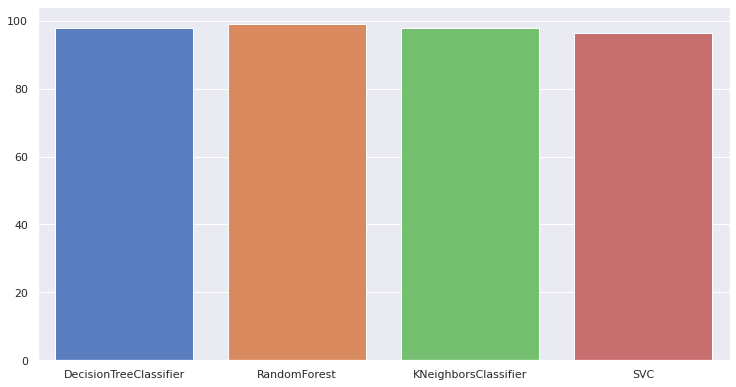

In [277]:
kernal_name = list(scores_dict.keys())
kernal_accuracy = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=kernal_name,y=kernal_accuracy)

## Comparison

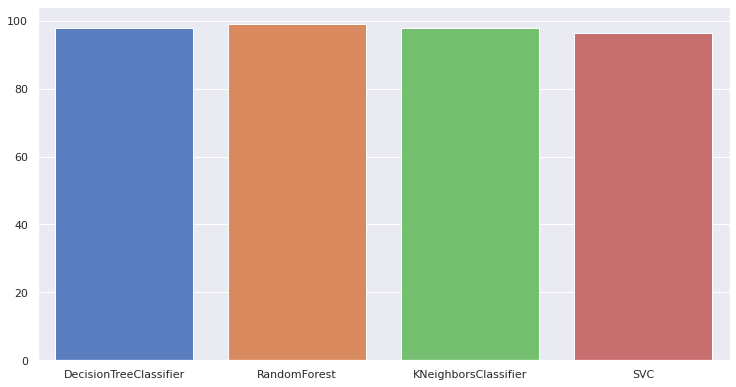

In [279]:

algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)